# Análise Exploratória dos Títulos da Netflix

**Autor:** Ismael Ribeiro dos Santos Lima  
**Data:** Maio de 2025  
**Ferramentas:** Python · Pandas · Matplotlib · Seaborn

> Este projeto realiza uma análise exploratória dos dados da Netflix, buscando entender padrões em tipos de conteúdo, duração, gêneros, países de origem e datas de adição ao catálogo.

## Sumário

1. Importação de bibliotecas e dados
2. Tratamento de dados nulos
3. Conversões e limpeza
4. Análise exploratória (EDA)
   - Distribuição de tipos (Filme x Série)
   - Duração média dos filmes
   - Gêneros mais frequentes
   - Diretores com mais obras
   - Países com mais títulos
   - Evolução ao longo do tempo
5. Conclusões e insights finais

## 1. Importação de bibliotecas e dados <a name="importacao"></a>

Analise realizada por: 
Ismael Ribeiro Dos Santos Lima

### Leitura da base

* Carregar os dados usando Pandas e visualizar as 10 primeiras linhas.

### Tratamento inicial

* Verificar valores nulos e tratalos da melhor forma.

* Converter a coluna date_added para o formato de data (datetime).

### Análises descritivas

* Quantos títulos (filmes/séries) a Netflix tem no total?

* Qual a proporção de filmes e séries?

* Quantos títulos foram adicionados por ano (exibir gráfico de linha)?

* Quais são os 10 países com mais títulos no catálogo?

* Quais são os gêneros mais frequentes?

### Análises avançadas

* Qual diretor teve mais títulos adicionados na plataforma?

* Existe alguma tendência de aumento ou queda na adição de títulos por ano?

* Qual a média de duração dos filmes (em minutos)?

* Qual a série mais longa presente no catálogo?

### Extras (Desafio Bônus)

* Criar um gráfico de barras que mostre os 10 atores/atrizes mais frequentes nos títulos.

* Criar um heatmap com a quantidade de lançamentos por ano e por mês.



# Analise Netflix

## Preparação dos dados

In [4]:
import pandas as pd

In [5]:
netflix_df = pd.read_csv(r'netflix_titles.csv', sep=',', encoding='utf-8')

display(netflix_df.info())
display(netflix_df)

FileNotFoundError: [Errno 2] No such file or directory: 'netflix_titles.csv'

In [ ]:
#tratamento de dados nulos
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['date_added'] = netflix_df['date_added'].fillna('Unknown')
netflix_df['rating'] = netflix_df['rating'].fillna('Unknown')
netflix_df['duration'] = netflix_df['duration'].fillna('Unknown')

#tratamento de datatime

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

#colunas numericas

netflix_df['duration minutes'] = netflix_df['duration'].str.extract('(\d+)').astype(float)
netflix_df.info()

#coluna para fazer o data_thunck

netflix_df['data_mes'] = netflix_df['date_added'].dt.to_period('M').dt.to_timestamp()
netflix_df['data_ano'] = netflix_df['date_added'].dt.to_period('Y').dt.to_timestamp()


display(netflix_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration minutes  8804 non-null   float64       
 13  data_mes          8709 non-null   datetime64[ns]
 14  data_ano          8709 n

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_14684\3069194854.py:15: SyntaxWarning: invalid escape sequence '\d'
  netflix_df['duration minutes'] = netflix_df['duration'].str.extract('(\d+)').astype(float)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration minutes,data_mes,data_ano,genre_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,2021-09-01,2021-01-01,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,2021-09-01,2021-01-01,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2021-09-01,2021-01-01,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2021-09-01,2021-01-01,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2021-09-01,2021-01-01,"[International TV Shows, Romantic TV Shows, TV..."


### Quantos titulos no total tem na netflix

In [ ]:
titulos_totais = len(netflix_df['title'].unique())
print(f'O total de titulos da netflix é de {titulos_totais}')

O total de titulos da netflix é de 8807


### Qual a proporção de filmes e series

In [ ]:
proporcao_fs = netflix_df['type'].value_counts()
filmes = proporcao_fs['Movie']
series = proporcao_fs['TV Show']

porcent_filmes = filmes/titulos_totais * 100
porcent_series = series/titulos_totais * 100

print(f'a relação de composição da netlfix é:')
print(f'{porcent_filmes:.2f}')
print(f'{porcent_series:.2f}')

proporcao_fs.plot(kind='pie')

NameError: name 'netflix_df' is not defined

### Quantos titulos foram adicionados por ano

<Axes: xlabel='ano', ylabel='titulos lançados'>

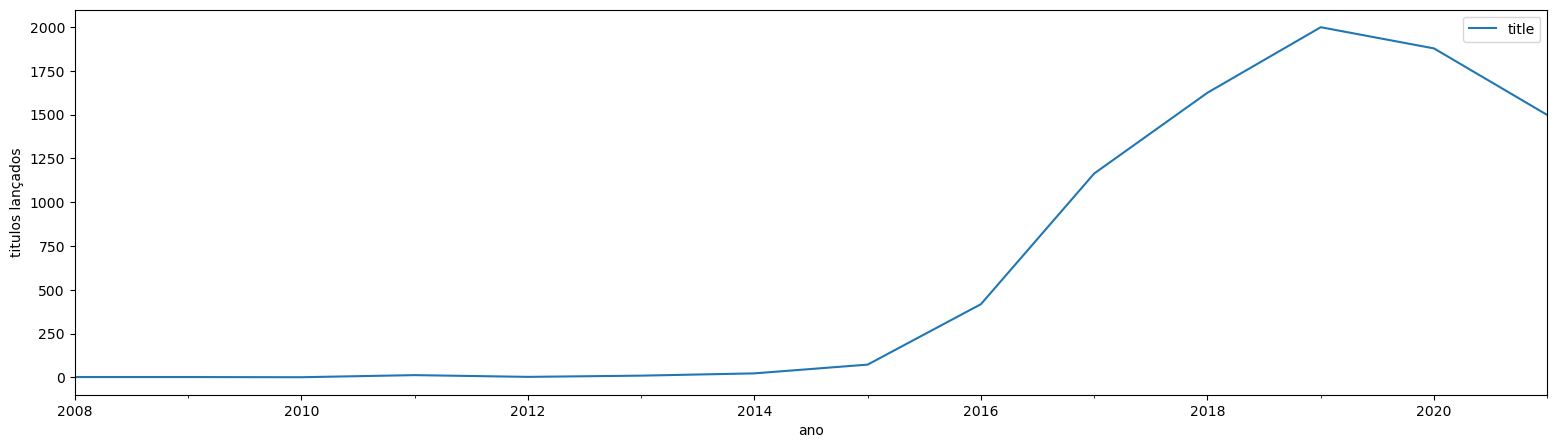

In [ ]:
titulos_anuais = netflix_df[['data_ano','title']]
titulos_anuais = titulos_anuais.groupby('data_ano').count()
titulos_anuais.plot(xlabel='ano', ylabel='titulos lançados',figsize=(19,5))

### quais são os 10 paises mais titulos no catalogo

<Axes: xlabel='country'>

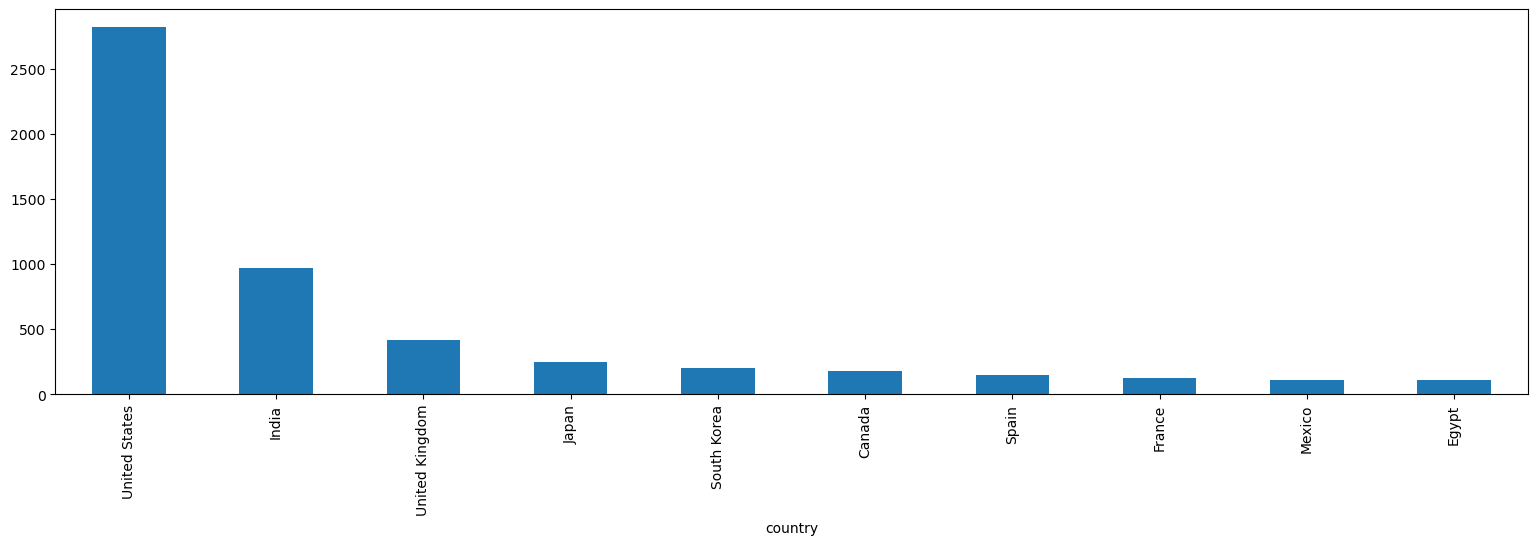

In [ ]:
paises_mais_acessados = netflix_df['country'][netflix_df['country'] != 'Unknown'].value_counts()
paises_mais_acessados[:10].plot(figsize=(19,5), kind='bar')


### Quais são os generos mais frequentes

genre_list
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

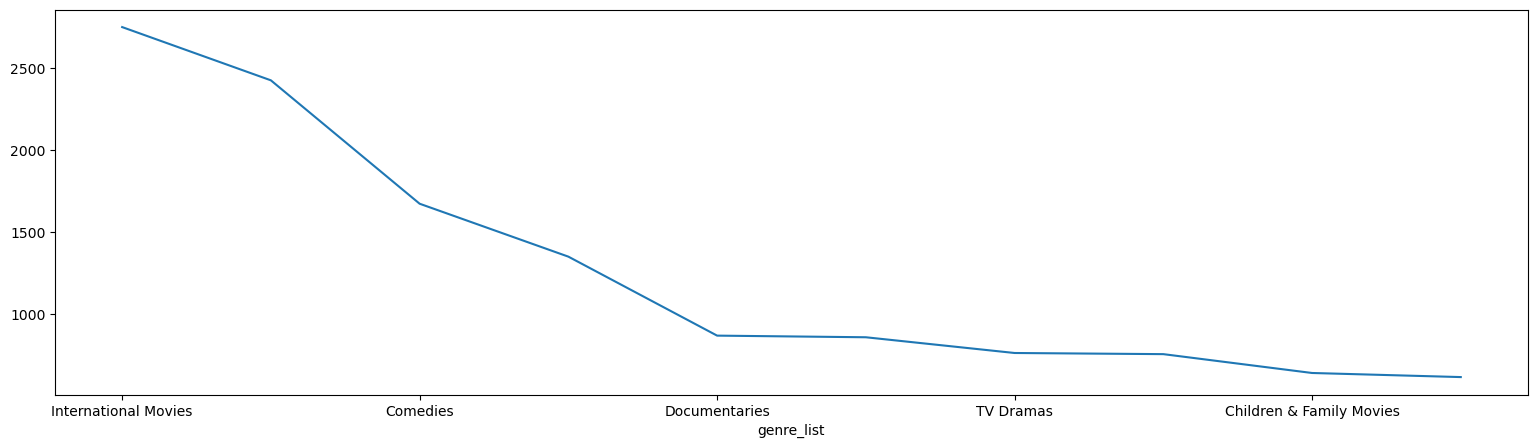

In [ ]:
netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

# 3. Explodir as listas em linhas (1 gênero por linha)
generos_explodidos = netflix_df.explode('genre_list')

contagem = generos_explodidos['genre_list'].value_counts()

contagem[:10].plot(figsize=(19,5))
display(contagem[:10])

### Media de duração de filmes

In [ ]:
duração_df = netflix_df[['type','duration minutes']]
duração_df = duração_df[duração_df['type'] == 'Movie']
media_duração = duração_df['duration minutes'].mean()
print(f'a duração media de filmes da netflix é de {media_duração:.0f} min')


a duração media de filmes da netflix é de 100 min


## Qual o diretor com mais titulos na plataforma

In [ ]:
diretor_popular = netflix_df['director'][netflix_df['director']!= 'Unknown'].value_counts()
print(f'o diretor com titulos na plataforma é : {diretor_popular.index[0]}, com um total de {diretor_popular.iloc[0]} titulos')
#print(f'o diretor mais popular da plataforma é: {}')

o diretor com titulos na plataforma é : Rajiv Chilaka, com um total de 19 titulos


### Analise dos principais atores 

<Axes: xlabel='atores'>

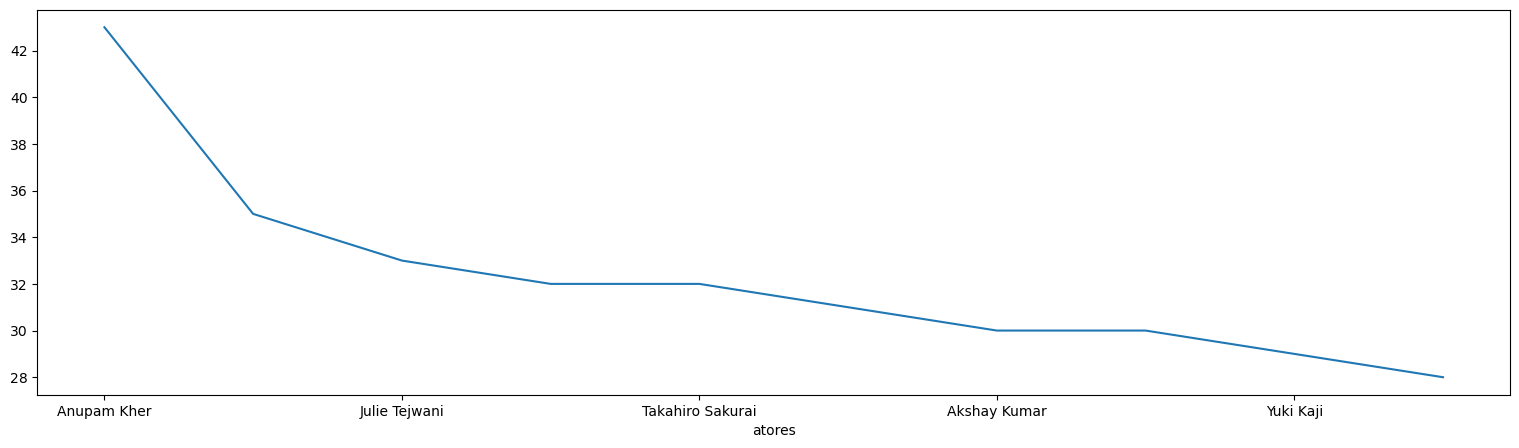

In [ ]:

netflix_df['atores'] = netflix_df['cast'].str.split(', ')
atores_individuais = netflix_df.explode('atores')
contagem_atores = atores_individuais[atores_individuais['atores'] != 'Unknown']['atores'].value_counts()
contagem_atores[:10].plot(figsize=(19,5))

## Conclusões da Análise

- A maioria dos títulos são filmes (~70%).

- O gênero mais comum é "Dramas", seguido por "Comedies".

- EUA lidera com mais de 30% dos títulos.

- Houve crescimento na adição de títulos até 2019, depois queda (possível impacto da pandemia).


- Atores e atrizes mais frequentes tendem a participar de múltiplas produções originais.